# Lending Club Case Study

## Business Objectives
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
### Identification of such applicants using EDA is the aim of this case study.

### Important
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
#loading required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime

# Adding library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data in to Data frames

loan_df = pd.read_csv("loan.csv")
data_dictionary_df = pd.read_excel("Data_Dictionary.xlsx")

## Step 1: Understanding Data

In [3]:
#get Details of Data and columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Table View of Data (Some rows and all columns)

In [4]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### There are many rows where rows data is null/Nan, can investigate more on this

In [5]:
# Total null value on each Columns
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### There are Columns which are having null for all rows, so can be removed

In [6]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Data Cleaning

In [7]:
# Total null value on each Columns
loan_df.isnull().sum()
#loan_df.dropna(axis=1, how='all')

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### There are columns 'next_paymnt_d', ' mths_since_last_delinq' and 'mths_since_last_record' where majority of records are null and seems to be not required 

In [8]:
loan_df.drop(['next_pymnt_d', "mths_since_last_delinq","mths_since_last_record"],axis = 1, inplace = True)

In [9]:
# Fither Investigating columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### There are some columns which are related to Customer, not required for any business point of View like Address

In [10]:
notRelated_column = ["url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state"]
loan_df.drop(notRelated_column,axis = 1, inplace = True)

In [11]:
# Fither Investigating columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [12]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [13]:
# Identifying more colums which may not required
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,67.79,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Threre are some columns which are not required and also some columns may have identical values which may can drop

In [14]:
# Removing not required fields
notRelated_column1 = ["id", "member_id", "grade", "sub_grade", "policy_code","desc"]
loan_df.drop(notRelated_column1,axis = 1, inplace = True)

In [15]:
# Dropping coluns where value or data is common across rows
common_value_columns = loan_df.nunique()
colToDrop = common_value_columns[common_value_columns.values == 1]
loan_df.drop(columns = list(colToDrop.index), inplace=True)

In [16]:
# Identifying more colums which may not required
pd.options.display.max_columns = None
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,0.0


## Data Manipuation/Standardization
### like term/int_rate/emp_length

In [17]:
#Removing months
loan_df['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [18]:
loan_df['term'] = loan_df['term'].apply(lambda x: pd.to_numeric(x.split("months")[0]))

In [19]:
#Removing months
loan_df['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
20.52%      1
24.59%      1
16.96%      1
21.48%      1
24.40%      1
Name: int_rate, Length: 371, dtype: int64

In [20]:
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [21]:
# Standardizing Employee Length
loan_df.emp_length.fillna('0',inplace=True)

In [22]:
loan_df['emp_length'] = loan_df.emp_length.str.extract('(\d+)')
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,0.0
1,2500,2500,2500.0,60,15.27,59.83,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,0.0
2,2400,2400,2400.0,36,15.96,84.33,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,0.0
3,10000,10000,10000.0,36,13.49,339.31,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,0.0
4,3000,3000,3000.0,60,12.69,67.79,1,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,0.0


In [23]:
# Converting date Year
def convertToDate(x):
    if int(x.split('-')[1]) > 22 and int(x.split('-')[1]) <= 99:
        yy = ' 19'+x.split('-')[1]
    else:
        yy = ' 20'+x.split('-')[1]
        
    y = x.split('-')[0] + yy
    return datetime.strftime(datetime.strptime(y, '%b %Y'), '%b %Y')

loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: convertToDate(x))
loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].apply(lambda x: convertToDate(x))

In [24]:
# Converting fields to numeric
columns_toNumeric= ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_df[columns_toNumeric] = loan_df[columns_toNumeric].apply(pd.to_numeric)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  int64  
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   emp_length               39717 non-null  int64  
 7   home_ownership           39717 non-null  object 
 8   annual_inc               39717 non-null  float64
 9   verification_status      39717 non-null  object 
 10  issue_d                  39717 non-null  object 
 11  loan_status              39717 non-null  object 
 12  purpose                  39717 non-null  object 
 13  dti                      39717 non-null  float64
 14  delinq_2yrs           

## Check for Outliers

In [25]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='annual_inc'>

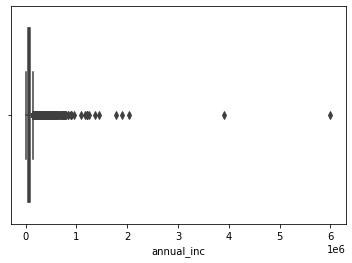

In [26]:
sns.boxplot(loan_df['annual_inc'])

## Handling Outliers

In [27]:
# quantifying the Annual_inc
quantile_account_inc = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_account_inc

0.50     59000.00
0.75     82300.00
0.90    116000.00
0.95    142000.00
0.97    165757.92
0.98    187000.00
0.99    234999.36
Name: annual_inc, dtype: float64

In [28]:
''' Detection '''
# IQR
Q1 = np.percentile(loan_df['annual_inc'], 25,interpolation = 'midpoint')
Q3 = np.percentile(loan_df['annual_inc'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", loan_df.shape)
 
# Upper bound
upper = np.where(loan_df['annual_inc'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(loan_df['annual_inc'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
loan_df.drop(upper[0], inplace = True)
loan_df.drop(lower[0], inplace = True)
print("New Shape: ", loan_df.shape)

Old Shape:  (39717, 34)
New Shape:  (37874, 34)


<AxesSubplot:xlabel='annual_inc'>

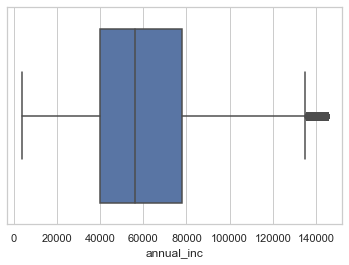

In [29]:
sns.set_theme(style="whitegrid")
sns.boxplot(loan_df.annual_inc)

In [39]:
loan_df.loan_amnt.describe()

count    37874.000000
mean     10869.161562
std       7174.041656
min        500.000000
25%       5100.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

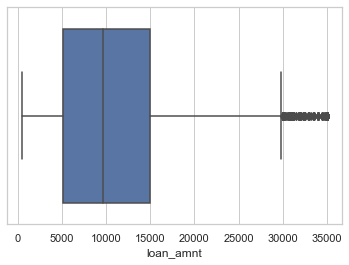

In [31]:
sns.boxplot(loan_df.loan_amnt)

In [42]:
loan_df.total_pymnt.describe()

count    37874.000000
mean     11741.787359
std       8660.810082
min          0.000000
25%       5489.015296
50%       9595.219589
75%      15941.307470
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

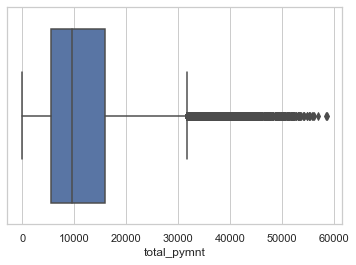

In [40]:
sns.boxplot(loan_df.total_pymnt)

In [41]:
loan_df.total_pymnt.describe()

count    37874.000000
mean     11741.787359
std       8660.810082
min          0.000000
25%       5489.015296
50%       9595.219589
75%      15941.307470
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

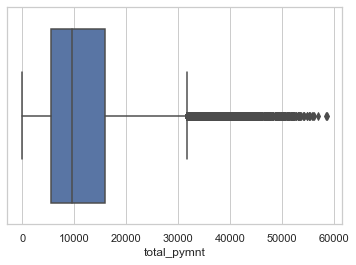

In [33]:
sns.boxplot(loan_df.total_pymnt)

In [43]:
loan_df.int_rate.describe()

count    37874.000000
mean        11.974104
std          3.698902
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

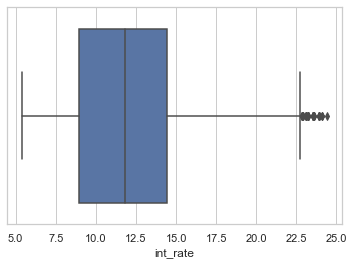

In [34]:
sns.boxplot(loan_df.int_rate)

In [44]:
loan_df.funded_amnt_inv.describe()

count    37874.000000
mean     10081.398689
std       6854.151680
min          0.000000
25%       5000.000000
50%       8500.000000
75%      13975.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

<AxesSubplot:xlabel='funded_amnt_inv'>

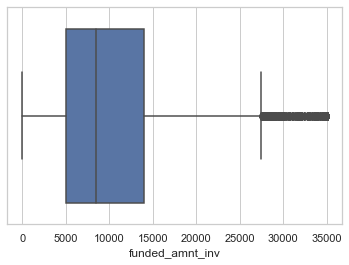

In [36]:
sns.boxplot(loan_df.funded_amnt_inv)

In [45]:
loan_df.dti.describe()

count    37874.000000
mean        13.483965
std          6.666785
min          0.000000
25%          8.390000
50%         13.620000
75%         18.750000
max         29.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti'>

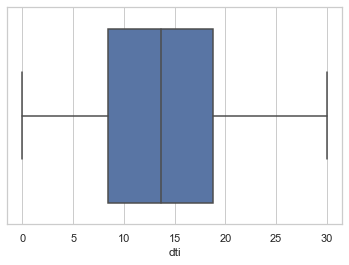

In [38]:
sns.boxplot(loan_df.dti)